In [1]:
import extract_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy.signal import filtfilt, butter, iirnotch, welch
import math
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data_train, words_train, starts_train, ends_train = extract_data.extract_data(r"C:\Users\lwing\College\Spring 2022\Senior Design\SilentSpeechDAS\fEMGData\mouthed_NewVocab_6_18th_set1.txt", r"C:\Users\lwing\College\Spring 2022\Senior Design\silent-speech\scripts\Mouthed_NewVocab_6_18th_set1_take3.txt")
data_test, words_test, starts_test, ends_test = extract_data.extract_data(r"C:\Users\lwing\College\Spring 2022\Senior Design\SilentSpeechDAS\fEMGData\mouthed_NewVocab_6_18th_set2.txt", r"C:\Users\lwing\College\Spring 2022\Senior Design\silent-speech\scripts\Mouthed_NewVocab_6_18th_set2_txt")

2022-04-18T15:41:16.932-05
2022-04-18T16:01:52.268-05


In [5]:
chan_1_test = data_test[:,0]
chan_2_test = data_test[:,1]
chan_3_test = data_test[:,2]
chan_4_test = data_test[:,3]
chan_5_test = data_test[:,4]
chan_6_test = data_test[:,5]
channel_data_test = [chan_1_test, chan_2_test, chan_3_test, chan_4_test, chan_5_test, chan_6_test]

In [6]:
chan_1_train = data_train[:,0]
chan_2_train = data_train[:,1]
chan_3_train = data_train[:,2]
chan_4_train = data_train[:,3]
chan_5_train = data_train[:,4]
chan_6_train = data_train[:,5]
channel_data_train = [chan_1_train, chan_2_train, chan_3_train, chan_4_train, chan_5_train, chan_6_train]

### Creating target variable list

In [7]:
len(chan_1_train)

778050

In [8]:
len(chan_1_test)

791550

In [9]:
y_train = np.zeros(778050)
y_test = np.zeros(791550)

In [10]:
for i in range(len(starts_train)):
    y_train[starts_train[i]:ends_train[i]+1] = 1

In [11]:
for i in range(len(starts_test)):
    y_test[starts_test[i]:ends_test[i]+1] = 1

In [12]:
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))

236060
238506


In [13]:
print(len(y_train))
print(len(y_test))

778050
791550


### Filtering

In [19]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_train = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_train):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_train[idx] = abs(signal_filtered)

In [20]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_test = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_test):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_test[idx] = abs(signal_filtered)

### RMS

In [15]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_train:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

In [16]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_test:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

### Deleting extraneous data

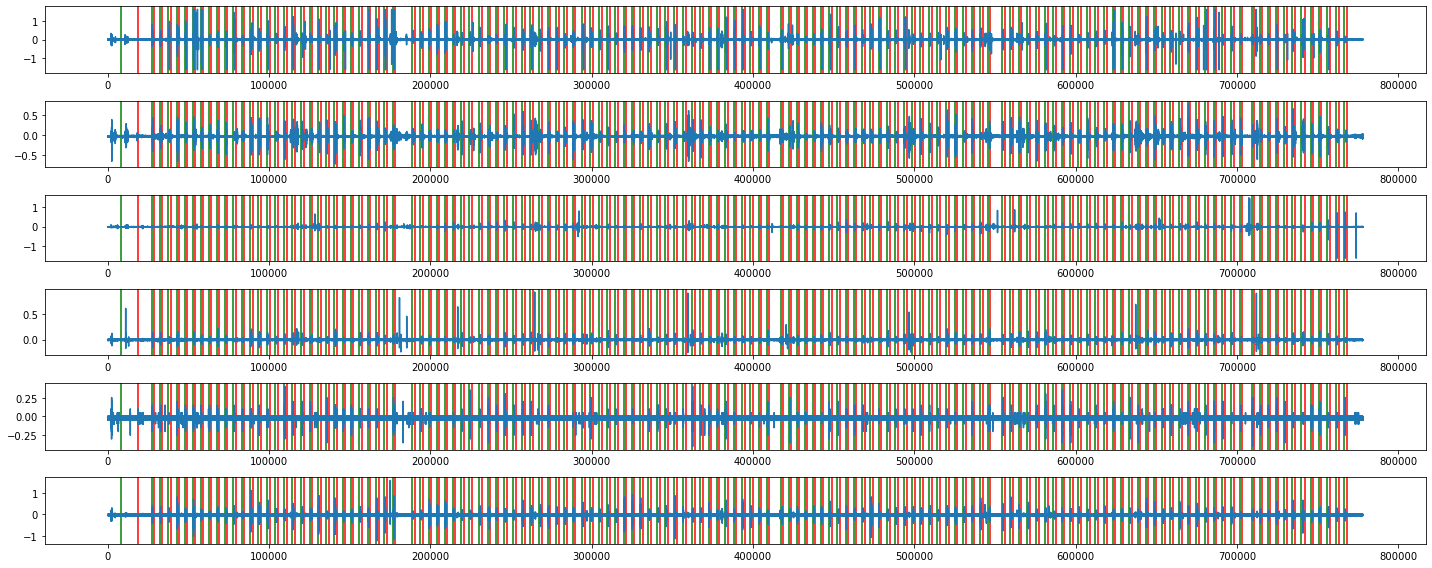

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_train[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_train,-2,2,'g'); plt.vlines(ends_train,-2,2,'r')

plt.tight_layout()
plt.show()

In [17]:
print(starts_train)
print(ends_train)

[  7981  27185  32258  37573  42698  47792  52850  57606  62624  67605
  72813  77795  82976  88260  93447  98639 103917 109207 114416 120017
 125152 130312 135501 140541 145734 150798 155885 161193 166419 171546
 176590 188890 193716 199031 203980 208845 214106 219092 224113 230174
 235467 240689 245808 251248 256765 262049 267327 272717 277997 283005
 288146 294061 299269 304577 309648 314655 319782 324916 329826 335076
 340580 345762 351070 356388 362126 367329 372511 377606 382761 388031
 393287 398400 403535 408684 417375 422545 427270 432237 437282 441888
 446933 452299 457387 462629 467551 472761 477888 482934 488136 493374
 498768 503779 508932 514264 519513 524947 530233 535494 540642 545968
 554500 559463 564729 569845 575325 580763 586191 591353 596422 601668
 606978 612189 617636 622943 628173 633254 638489 643404 648684 653733
 658722 664200 669467 674796 679948 685582 690809 696144 702034 709421
 714210 719093 724264 729250 734318 739584 745882 750866 756043 761412
 76658

In [22]:
#deleting indices :24887,486094-504933, 763442:

for i in range(len(filtered_data_train)):
    filtered_data_train[i] = filtered_data_train[i][27185:767978]
    

In [23]:
len(filtered_data_train[0])

740793

In [24]:

y_train = y_train[27185:767978]
len(y_train)

740793

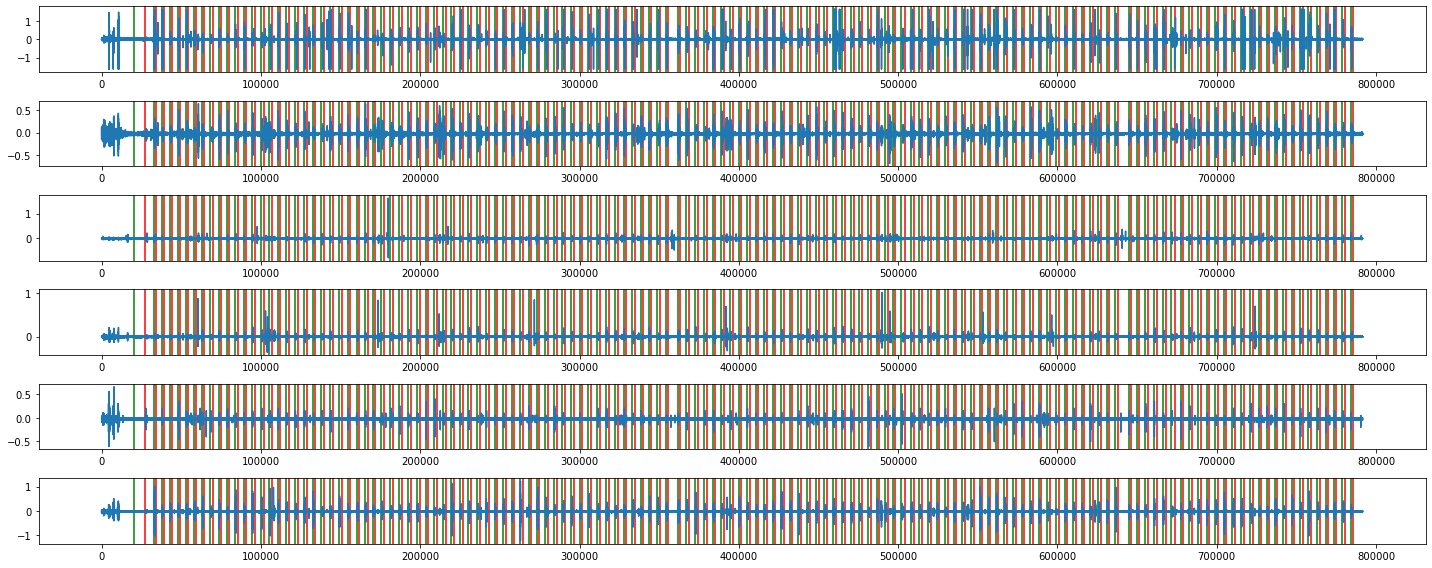

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_test[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_test,-2,2,'g'); plt.vlines(ends_test,-2,2,'r')

plt.tight_layout()
plt.show()

In [26]:
print(starts_test)
print(ends_test)

[ 20364  32623  37607  42636  47913  52995  57965  62785  68300  73377
  78732  83790  89065  94402 100161 105346 110565 115835 121328 127042
 132686 137950 143377 148880 154430 160004 165286 170396 175403 181197
 186517 192130 198021 203368 208571 214212 219612 224922 230269 235839
 241182 246649 251915 257316 262588 267999 273279 278504 284054 289289
 294780 300127 305547 311081 316536 322299 327823 333255 338456 343505
 348948 354214 361748 367097 372552 378233 383698 389108 394463 400044
 405167 410495 415709 421175 426492 431856 437239 442720 448269 453669
 459180 464595 470205 475707 481246 486549 491831 497099 502083 507970
 513401 518827 524362 529516 534821 540378 545786 551316 556533 561555
 566749 572167 577552 582903 588374 593618 598943 604459 609944 615152
 620400 625752 631024 636293 644674 649764 654925 660354 666013 671608
 677365 682664 688245 693635 698971 704583 709785 715369 720929 726395
 731428 736444 741809 747040 752133 757583 763072 768468 773568 778813
 78405

In [27]:
#deleting indices :20750, 747706:

for i in range(len(filtered_data_test)):
    filtered_data_test[i] = filtered_data_test[i][32623:785531]

In [28]:
len(filtered_data_test[0])

752908

In [29]:
y_test = y_test[32623:785531]

### Downsampling y

In [30]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_train_new = np.zeros(int(len(y_train)/20)+1)
i = 0
while ind1 < len(y_train):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_train):
        ind2 = len(y_train)-1
                
    num_label = np.count_nonzero(y_train[ind1:ind2])
    if num_label > 19:
        y_train_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [31]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_test_new = np.zeros(int(len(y_test)/20)+1)
i = 0
while ind1 < len(y_test):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_test):
        ind2 = len(y_test)
                
    num_label = np.count_nonzero(y_test[ind1:ind2])
    if num_label > 19:
        y_test_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [32]:
print(len(y_train))
print(len(y_train_new))
print(len(y_test))
print(len(y_test_new))

740793
37040
752908
37646


### Smoothing data as described by SAD doc

In [33]:
def rms(raw):
        rms_window = deque([0,0,0,0,0])
        rms_data = np.zeros(len(raw))
        for i, sample in enumerate(raw):
            rms_window.popleft()
            rms_window.append(sample)
            val = np.sqrt(sum(np.square(rms_window)/5))
            rms_data[i] = val
            
        return rms_data
    
    
#TO DO: MAKE SURE ARRAY OUT OF BOUNDS CHECK IS SUFFICIENT
def smooth(rms_data):
        
    #large window to average over; sampling rate is 1000 Hz; each sample is a millisecond
    window = 40
        
    #overlap interval
    skip = 20
        
    ind1 = 0
    ind2 = window
    #assuming that the packet size i.e. length of raw data and rms_data will be a multiple of 20
    downsampled = np.zeros(int(len(rms_data)/20)+1)
    i = 0
    while ind1 < len(rms_data):
            
        #remaining data less than window size, avoid array out of bounds
        if ind2 > len(rms_data):
            ind2 = len(rms_data)-1
                
        val = np.mean(rms_data[ind1:ind2], dtype=np.float64)
        downsampled[i] = val
        ind1 = ind1 + skip
        ind2 = ind2 + skip
        i = i+1
            
    return downsampled
        
def calculate(smoothed_envelope):
        
    return np.abs(np.diff(smoothed_envelope))

In [34]:
ready_data_train = [0,0,0,0,0,0]

for i in range(len(filtered_data_train)):
    data_rms = rms(filtered_data_train[i])
    res = smooth(data_rms)
    ready_data_train[i] = res

In [36]:
ready_data_test = [0,0,0,0,0,0]

for i in range(len(filtered_data_test)):
    data_rms = rms(filtered_data_test[i])
    res = smooth(data_rms)
    ready_data_test[i] = res

In [37]:
print(np.count_nonzero(ready_data_train[0]))
print(np.count_nonzero(ready_data_test[0]))

37040
37646


In [38]:
print(len(ready_data_train[0]))
print(len(ready_data_test[0]))

37040
37646


In [39]:
y_train_new = y_train_new[:37040]
print(len(y_train_new))
y_test_new = y_test_new[:37646]
print(len(y_test_new))

37040
37646


### Making dataframe and prepping for decision tree classifier

In [154]:
df_train = pd.DataFrame({
    
    "Chan1": ready_data_train[0],
    "Chan2": ready_data_train[1],
    "Chan6": ready_data_train[5],
    "Y": y_train_new 
})

In [155]:
df_test = pd.DataFrame({
    
    "Chan1": ready_data_test[0],
    "Chan2": ready_data_test[1],
    "Chan6": ready_data_test[5],
    "Y": y_test_new 
})

In [156]:
X_train = df_train[['Chan1', 'Chan2', 'Chan6']]
y_train = df_train[['Y']]
X_test = df_test[['Chan1', 'Chan2','Chan6']]
y_test = df_test[['Y']]

In [157]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [159]:
print(clf.score(X_test, y_test))

0.7792594166710939


In [160]:
print(np.mean(cross_val_score(clf, X_train, y_train)))

0.7794276457883369


In [161]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)



0.7792594166710939
[[21260  4804]
 [ 3506  8076]]


In [166]:
isSpeech = False
inactive_count=0
active_count=0
inactive_thresh = 5
active_thresh = 2

speech_event = np.zeros(37646)

for sample_idx in range(37646):       
    
    num_active = predicted
    
            
    if isSpeech:
        if not num_active[sample_idx]:
            inactive_count += 1
        else:
            inactive_count = 0
            
        if inactive_count > inactive_thresh:
            isSpeech = False
            speech_event[sample_idx] = 0
                    
        else:
            isSpeech = True
            speech_event[sample_idx] = 1
     
        
    else:
        #updating speech event count
        if num_active[sample_idx]:
            active_count += 1
        else:
            active_count = 0
        
        #Speech Event conditional
        if active_count > active_thresh:
            isSpeech = True
            speech_event[sample_idx] = 1
                        
        else:
            isSpeech = False
            speech_event[sample_idx] = 0

In [167]:
ac=accuracy_score(speech_event,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(speech_event, predicted)
print(cm)

0.833793762949583
[[20615  3334]
 [ 4151  9546]]


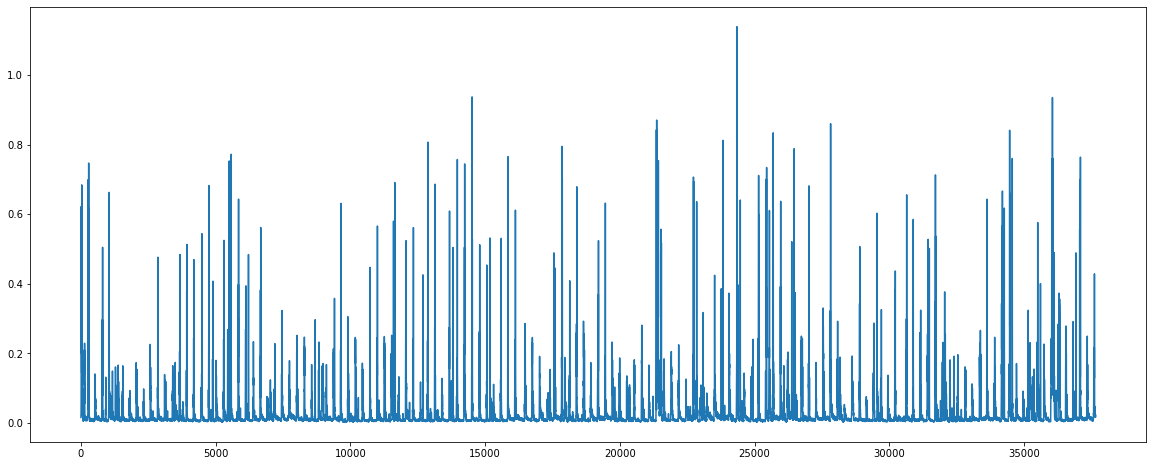

In [168]:
plt.figure(figsize=(20,8))
plt.plot(ready_data_test[0])

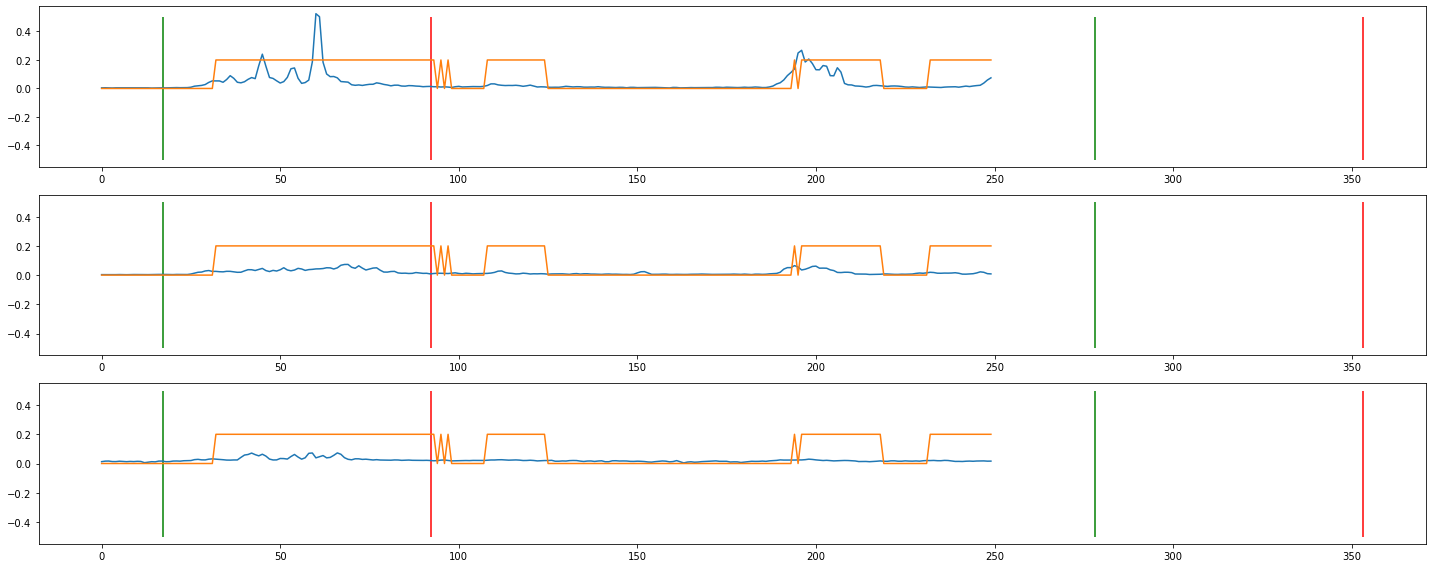

In [169]:
plt.figure(figsize=(20,8))
idx = [0,1,5]
for i, val in enumerate(idx):
    plt.subplot(3,1,i+1)
    plt.plot(range(250),ready_data_test[val][5250:5500])
    plt.plot(range(250),speech_event[5250:5500]*.2)
    plt.vlines(starts_test[15:17]/20-5250,-.5,.5,'g'); plt.vlines(ends_test[15:17]/20-5250,-.5,.5,'r')
plt.tight_layout()
plt.show()

In [170]:
import pickle
file_name_scaler = "scaler.pkl"
file_name_classifier = "classifier.pkl"
with open(file_name_scaler, "wb") as open_file:
    pickle.dump(scaler, open_file)
    
with open(file_name_classifier, "wb") as open_file:
    pickle.dump(clf, open_file)